Analysis Tasks to be performed:

Import the three datasets

Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
        1.User Age Distribution
        2.User rating of the movie “Toy Story”
        3.Top 25 movies by viewership rating
        4.Find the ratings for all the movies reviewed by for a particular user of user id = 2696

Feature Engineering:

    Use column genres:

    1.Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
    2.Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
    3.Determine the features affecting the ratings of any particular movie.
    4.Develop an appropriate model to predict the movie ratings

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
ratings_header = "UserID::MovieID::Rating::Timestamp".split("::")
users_header = "UserID::Gender::Age::Occupation::Zip_code".split("::")
movies_header = "MovieID::Title::Genres".split("::")

In [3]:
print(ratings_header)
print(users_header)
print(movies_header)

['UserID', 'MovieID', 'Rating', 'Timestamp']
['UserID', 'Gender', 'Age', 'Occupation', 'Zip_code']
['MovieID', 'Title', 'Genres']


In [4]:
movies = pd.read_csv("movies.dat", sep="::", names=movies_header)
users = pd.read_csv("users.dat", sep="::", names=users_header)
ratings = pd.read_csv("ratings.dat", sep="::", names=ratings_header)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid 

In [5]:
movies.head(10)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [6]:
movie_and_ratings = pd.merge(movies,ratings, on="MovieID")

In [7]:
movie_and_ratings.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [8]:
master_ratings = pd.merge(movie_and_ratings, users, on="UserID" )

In [9]:
master_ratings.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [10]:
master_ratings.isnull().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip_code      0
dtype: int64

Explore the datasets using visual representations (graphs or tables), also include your comments on the following:

    1.User Age Distribution
    2.User rating of the movie “Toy Story”
    3.Top 25 movies by viewership rating
    4.Find the ratings for all the movies reviewed by for a particular user of user id = 2696


In [11]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

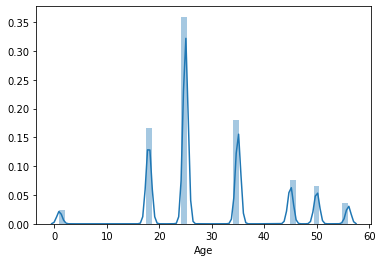

In [12]:
sns.distplot(master_ratings["Age"])

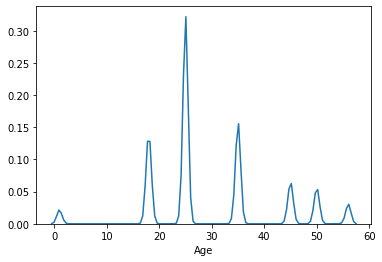

In [13]:
sns.distplot(master_ratings["Age"], hist =False)

In [14]:
groupedby_movieName = master_ratings.groupby('Title')
groupedby_rating = master_ratings.groupby('Rating')
groupedby_uid = master_ratings.groupby('UserID')

In [15]:
ToyStory_data = groupedby_movieName.get_group('Toy Story (1995)')
ToyStory_data.shape

(2077, 10)

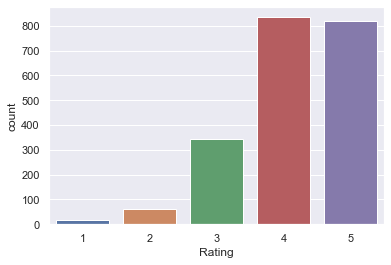

In [16]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Rating", data=ToyStory_data)

- sort the data according to the ratings
- extract the movie ID and title from the data
- drop duplicate
- extract the title of top 25 movie

In [17]:
ratings_sort = master_ratings.sort_values(by ='Rating')

In [18]:
ratings_sort.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip_code
857157,1680,Sliding Doors (1998),Drama|Romance,4933,1,962652179,M,25,15,94040
575675,688,Operation Dumbo Drop (1995),Action|Adventure|Comedy|War,6035,1,956713549,F,25,1,78734
196709,473,In the Army Now (1994),Comedy|War,1951,1,974697911,F,18,4,90630
65101,2322,Soldier (1998),Action|Adventure|Sci-Fi|Thriller|War,746,1,975468880,F,18,19,95019
65099,2298,Strangeland (1998),Thriller,746,1,975470858,F,18,19,95019


In [19]:
#Use the following features:movie id,title
ratings_sort = ratings_sort[['MovieID','Title']]

In [20]:
ratings_sort[25:]

,MovieID,Title
575677,737,Barb Wire (1996)
65121,2586,"Goodbye, Lover (1999)"
65117,2540,"Corruptor, The (1999)"
65116,2505,8MM (1999)
575681,784,"Cable Guy, The (1996)"
...,...,...
562617,2414,Young Sherlock Holmes (1985)
562615,2396,Shakespeare in Love (1998)
562609,2300,"Producers, The (1968)"
562629,2819,Three Days of the Condor (1975)


In [21]:
ratings_sort.drop_duplicates(subset ="Title", keep = False, inplace = True) 

In [22]:
ratings_sort["Title"][25:]

127369               Live Virgin (1999)
611662          Proposition, The (1998)
642140    Hippie Revolution, The (1996)
642098                Scorta, La (1993)
642111             Happy Weekend (1996)
                      ...              
887257           Song of Freedom (1936)
842862          Follow the Bitch (1998)
979840                     Lured (1947)
267098         Bittersweet Motel (2000)
758252         One Little Indian (1973)
Name: Title, Length: 89, dtype: object

In [23]:
list(master_ratings[master_ratings.UserID == 2696]["Title"])

['Client, The (1994)',
 'Lone Star (1996)',
 'Basic Instinct (1992)',
 'E.T. the Extra-Terrestrial (1982)',
 'Shining, The (1980)',
 'Back to the Future (1985)',
 'Cop Land (1997)',
 'L.A. Confidential (1997)',
 'Game, The (1997)',
 'I Know What You Did Last Summer (1997)',
 "Devil's Advocate, The (1997)",
 'Midnight in the Garden of Good and Evil (1997)',
 'Palmetto (1998)',
 'Wild Things (1998)',
 'Perfect Murder, A (1998)',
 'I Still Know What You Did Last Summer (1998)',
 'Psycho (1998)',
 'Lake Placid (1999)',
 'Talented Mr. Ripley, The (1999)',
 'JFK (1991)']

Feature Engineering:

    Use column genres:

    1.Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
    2.Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
    3.Determine the features affecting the ratings of any particular movie.
    4.Develop an appropriate model to predict the movie ratings

In [30]:
geners_list = []

In [31]:
for i in movie_and_ratings["Genres"]:
    temp = i.split("|")
    print(temp)
    geners_list.extend(temp)
    print(geners_list)
    print()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 

KeyboardInterrupt: 

In [32]:
print(geners_list)

['Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Comedy', 

In [33]:
uniqueGeners = list(set(geners_list))

In [34]:
print(uniqueGeners)

['Comedy', 'Thriller', 'Horror', 'Romance', 'Crime', 'Documentary', 'War', 'Musical', 'Adventure', "Children's", 'Western', 'Mystery', 'Drama', 'Action', 'Film-Noir', 'Sci-Fi', 'Fantasy', 'Animation']


In [35]:
for i in uniqueGeners:
    print(i)

Comedy
Thriller
Horror
Romance
Crime
Documentary
War
Musical
Adventure
Children's
Western
Mystery
Drama
Action
Film-Noir
Sci-Fi
Fantasy
Animation


In [36]:
for i in uniqueGeners:
    master_ratings[i] = master_ratings["Genres"].str.contains(i)*1

In [37]:
master_ratings

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip_code,...,Adventure,Children's,Western,Mystery,Drama,Action,Film-Noir,Sci-Fi,Fantasy,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,1,0,0,0,0,0,0,0,1
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,1,0,0,0,0,0,0,0,1
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,1,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,1,0,1,1,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843,...,0,0,0,0,1,0,0,0,0,0
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843,...,0,0,0,0,0,0,0,0,0,0
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843,...,0,0,0,0,0,0,0,0,0,0
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843,...,0,0,0,0,0,1,0,0,0,0


3.Determine the features affecting the ratings of any particular movie.

In [38]:
master_ratings.Rating.unique()

array([5, 4, 3, 2, 1], dtype=int64)

4.Develop an appropriate model to predict the movie ratings